[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/Stitch-bleu/inde-577-project/blob/main/Supervised/4_Deep%20Neural%20Network/Deep_Neural_Network.ipynb)

# Deep Neural Network
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/Stitch-bleu/inde-577-project/blob/main/Supervised/4_Deep%20Neural%20Network/Deep_Neural_Network.ipynb)
In this notebook, we explore the use of a Deep Neural Network (DNN) for image classification on the Fashion MNIST dataset. Fashion MNIST consists of grayscale images representing 10 different clothing items, including T-shirts, trousers, and sneakers. The dataset contains 70,000 images, each in a consistent 28×28 pixel format, and is designed as a more challenging alternative to the traditional MNIST digit dataset.

Our goal is to train a DNN to accurately classify these images based on visual features, demonstrating how deep learning techniques can identify complex patterns in image data. We’ll preprocess the dataset, define a neural network architecture, and evaluate the model’s performance on test data. Through this approach, we aim to highlight the DNN’s effectiveness in handling image classification tasks and provide insights into model optimization.

# 1. Data

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


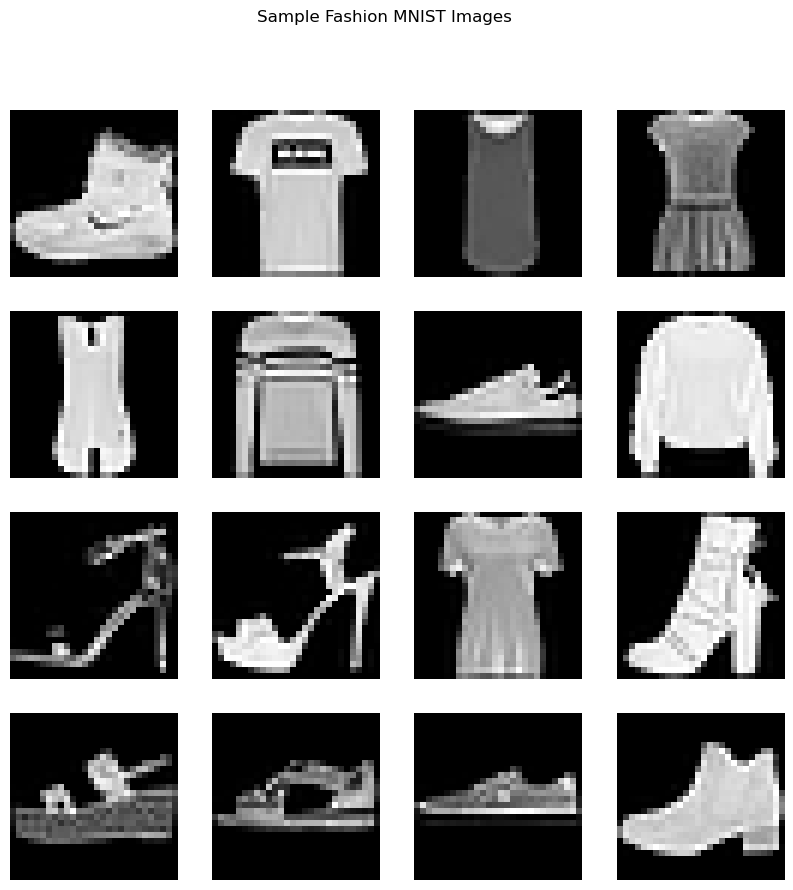

In [23]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis("off")
plt.suptitle("Sample Fashion MNIST Images")
plt.show()


In [25]:
# Normalize pixel values to range [0, 1]
X_train, X_test = X_train / 255.0, X_test / 255.0

# Flatten images to 1D arrays (28 * 28 = 784) for the fully connected DNN
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

# Verify reshaped dimensions
print("Training data reshaped:", X_train.shape)
print("Testing data reshaped:", X_test.shape)


Training data reshaped: (60000, 784)
Testing data reshaped: (10000, 784)


## 2.  Defining and Compiling the DNN Model

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential([
    Input(shape=(784,)),                     # Input layer with 784 neurons
    Dense(256, activation='relu'),           # First hidden layer
    Dense(128, activation='relu'),           # Second hidden layer
    Dense(64, activation='relu'),            # Third hidden layer
    Dense(10, activation='softmax')          # Output layer for 10 classes
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

## 3. Training and Visualizing

Epoch 1/10
1500/1500 - 3s - 2ms/step - accuracy: 0.8173 - loss: 0.5036 - val_accuracy: 0.8541 - val_loss: 0.4006
Epoch 2/10
1500/1500 - 2s - 2ms/step - accuracy: 0.8630 - loss: 0.3734 - val_accuracy: 0.8689 - val_loss: 0.3509
Epoch 3/10
1500/1500 - 2s - 2ms/step - accuracy: 0.8761 - loss: 0.3331 - val_accuracy: 0.8652 - val_loss: 0.3612
Epoch 4/10
1500/1500 - 2s - 1ms/step - accuracy: 0.8841 - loss: 0.3112 - val_accuracy: 0.8846 - val_loss: 0.3231
Epoch 5/10
1500/1500 - 2s - 1ms/step - accuracy: 0.8910 - loss: 0.2930 - val_accuracy: 0.8791 - val_loss: 0.3421
Epoch 6/10
1500/1500 - 2s - 1ms/step - accuracy: 0.8956 - loss: 0.2763 - val_accuracy: 0.8828 - val_loss: 0.3273
Epoch 7/10
1500/1500 - 2s - 1ms/step - accuracy: 0.9032 - loss: 0.2622 - val_accuracy: 0.8892 - val_loss: 0.3176
Epoch 8/10
1500/1500 - 2s - 1ms/step - accuracy: 0.9047 - loss: 0.2532 - val_accuracy: 0.8887 - val_loss: 0.3212
Epoch 9/10
1500/1500 - 2s - 1ms/step - accuracy: 0.9097 - loss: 0.2412 - val_accuracy: 0.8832 - 

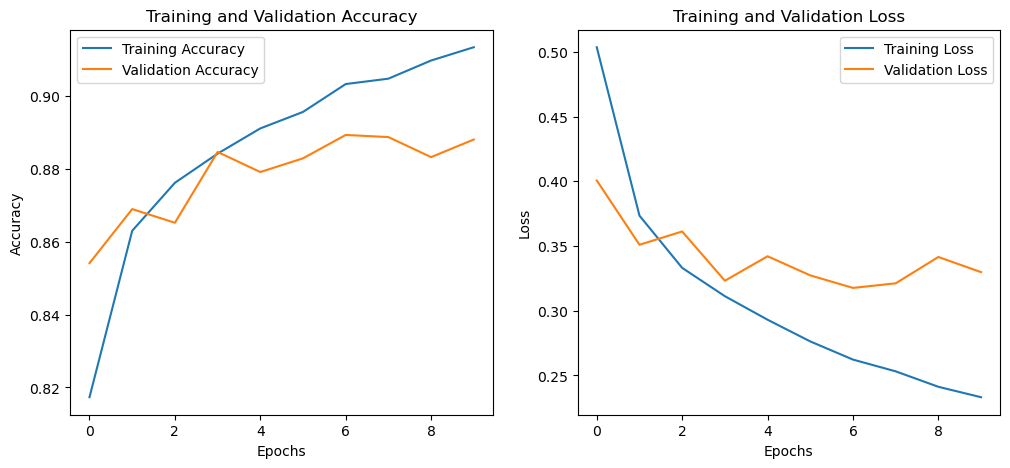

In [33]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32, verbose=2)


# Visualize the model
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


## 4. Evaluation

313/313 - 0s - 587us/step - accuracy: 0.8814 - loss: 0.3536
Test Accuracy: 0.8814
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step


<Figure size 1000x800 with 0 Axes>

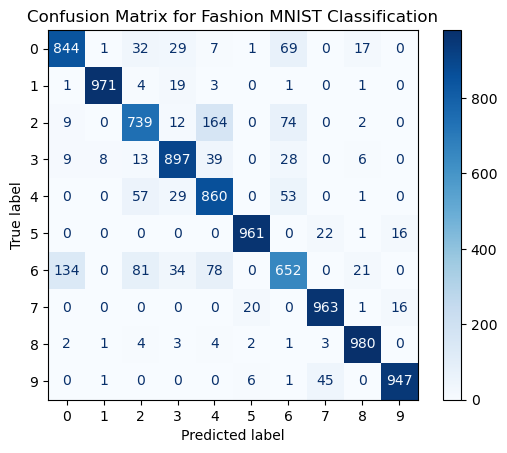

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate predictions
y_pred = model.predict(X_test).argmax(axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay(cm, display_labels=range(10)).plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix for Fashion MNIST Classification")
plt.show()
